# Field Research in Kenya

Energy access is multidimensional. In order to quantify and address energy demand and energy needs of the rural population, it is highly necessary to implement tools that are not limited to a purely binary assessment (household connected/not connected to the grid). Assessing energy needs shall take into account a wider range of attributes, measuring energy access in terms of affordability, reliability, quality, and safety of energy, as well as include the possibility of using modern and alternative sources (e.g., solar home systems, mini-grids).
The purpose of this study was to assess energy access of 137 households in the region of Arequipa (Peru). 
The approach implemented is based on the Multi-Tier Framework (MTF), developed by The World Bank.

The objective of this project is to analyze the access to energy (electricity and cooking solution) in a rural area of Kenya.
The research has been conducted by Hillary Kipcoech Korir, a master student at the 
[Panafrican University for Water and Energy Sciences](https://www.pauwes.dz/) (PAUWES) of Tlemcen (Algeria).

Data collection, processing and visualization have been supported by the [HEDERA Impact Toolkit](https://hedera.online/sdg7/index.html) Software. 
Relevant information concerning the use, associated costs and several attributes describing access to electricity and cooking solutions has been collected the customers of the financial institution in rural and remote areas
using the App HEDERA collect.
The HEDERA Impact Toolkit allows to efficiently evaluating a baseline for monitoring progress towards Sustainable Development Goal 7 following the [Multi-tier Framework](https://www.esmap.org/node/55526) (MTF), recently established by The World Bank, and the
Progress out of Energy Poverty Index (PEPI) [N. Realpe, PhD Thesis 2017](https://depositonce.tu-berlin.de/handle/11303/6708)




In [2]:
import os,sys, folium, pandas
HIT_PATH = '../../../HIT/src/' # local path to HIT src code
sys.path.insert(0, os.path.normpath(os.path.join(os.path.abspath(''), HIT_PATH)))
import hedera_types as hedera
import odk_interface as odk

import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
fontpath = '/Library/Fonts/JosefinSans-Regular.ttf'
fm.fontManager.addfont(fontpath)
prop = fm.FontProperties(fname=fontpath)

# change plot layout
plt.rcParams["font.family"] = prop.get_name()
plt.rcParams.update({'font.size': 18})
odk_data_dir = '../../../ODK_Collect_Data/Hillary_Kenya/'


odk_folder_dir = 'HEDERA_SDG7/'
#odk_folder_dir = 'HEDERA_SDG7_19_07_05/'
## @brief name of the file (this should not be changed, it is set from ODK)
odk_data_name = 'HEDERA_SDG7_results.csv'

# initialize the institution
mfi = hedera.mfi(4)

# read database
data = mfi.read_survey(odk_data_dir+odk_folder_dir+odk_data_name,
                           delimiter='-')
mfi.HH = odk.households(data)
collection_overview = odk.overview(mfi.HH,mfi)

## Collection overview

### Map
The Map allows to visualize the location of the collected GPS data. Missing data points are displayed with coordinated *(0,0)*

In [3]:

#Define initial geolocation
initial_location = [-0.2, 35.6]
map_osm = folium.Map(initial_location, zoom_start=9)
colors = {0: hedera.tier_color(0), 1 : hedera.tier_color(1), 2 : hedera.tier_color(2), 
          3 : hedera.tier_color(3), 4 : hedera.tier_color(4), 5: hedera.tier_color(5)}
mfi.HH.apply(lambda row:folium.CircleMarker(location=[row["GPS_Latitude"], row["GPS_Longitude"]],
                                        radius=10,fill_color=colors[row['E_Index']], 
                                        popup=' MTF Index: ' + str(row['E_Index'])).add_to(map_osm), axis=1)
map_osm

### Data per location
Data have been collected in five different locations.

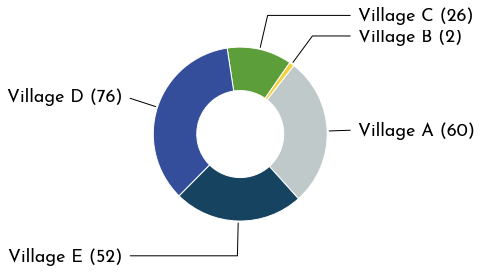

In [4]:
mfi.plot_collection_overview()


## Access to Electricity

### Attributes

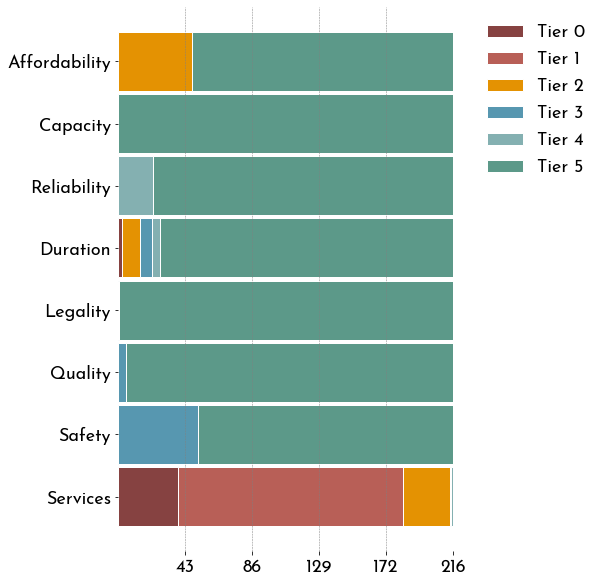

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.tier_barh(hedera.keys().attributes_electricity[0:8],
              hedera.names('en').e_attributes[0:8],legend=True)


### MTF Index (Access to electricity)

The MTF Index is given, for each household, by the minimum ranking among all considered attributes.

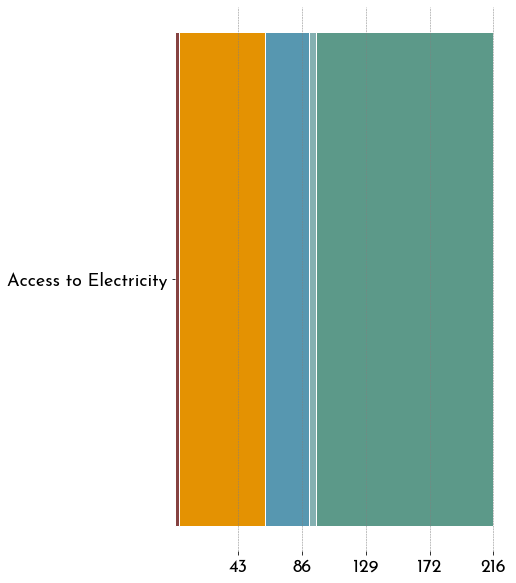

In [6]:

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.tier_barh(['E_Index'],['Access to Electricity'])


## Power sources
### Primary sources of electricity and illumination

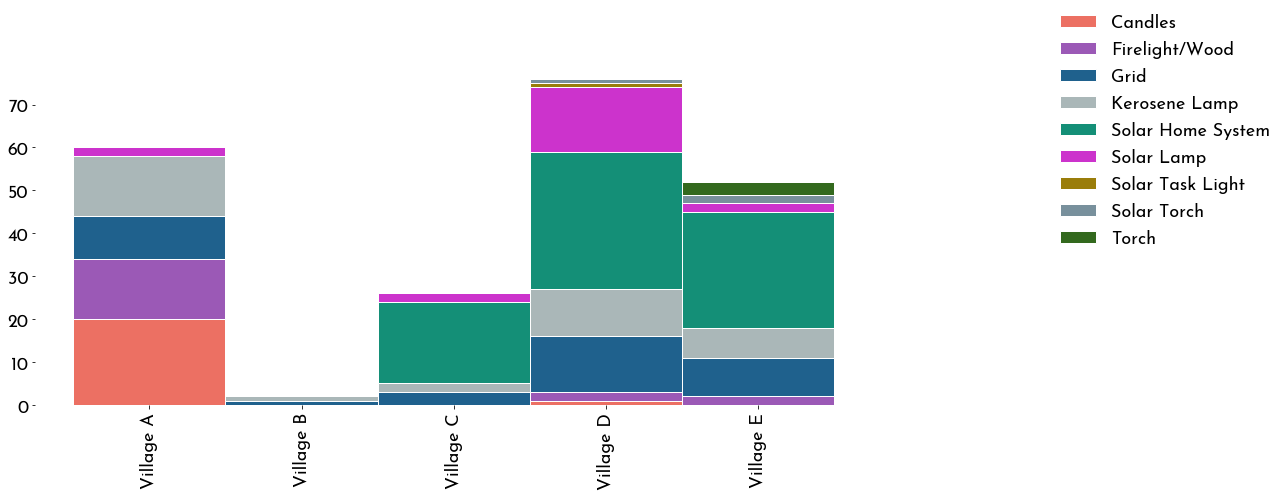

In [7]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.electricity_sources_summary(legend=True)

### Use of Multiple Power Sources

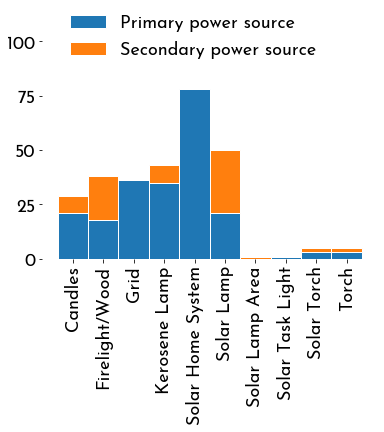

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
collection_overview = odk.overview(mfi.HH,mfi)
odk.plot_electricity_sources(collection_overview,'en')

## MTF Index (Access to Electricity) vs. Primary Power Source

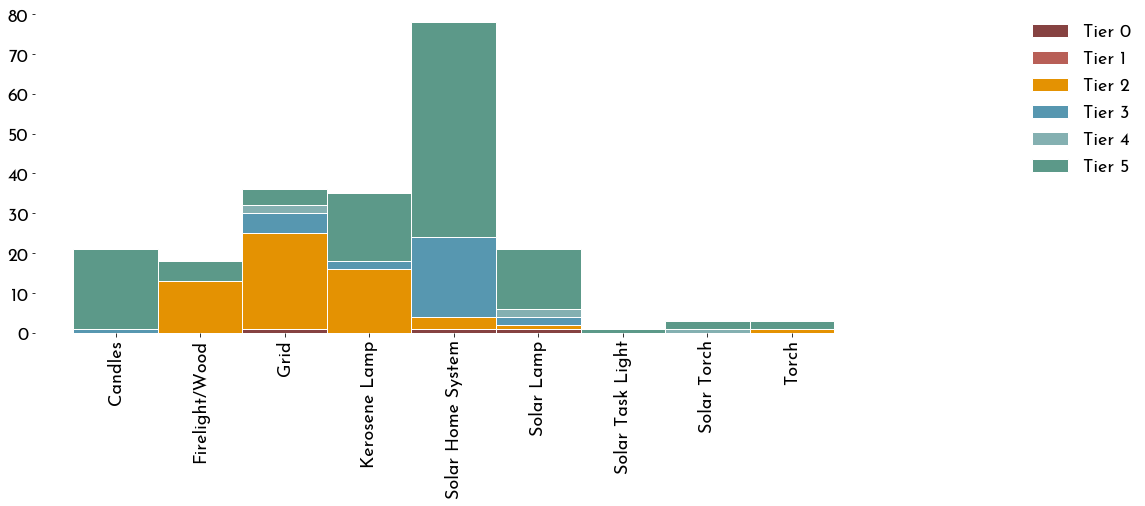

In [9]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.stacked_tier_per_category('E_Index',hedera.keys().powerSources,
                              'primary_electricity_source',
                              hedera.names('en').powerSources,legend=True)

## Access to Cooking Solutions

### Primary Cooking Fuels

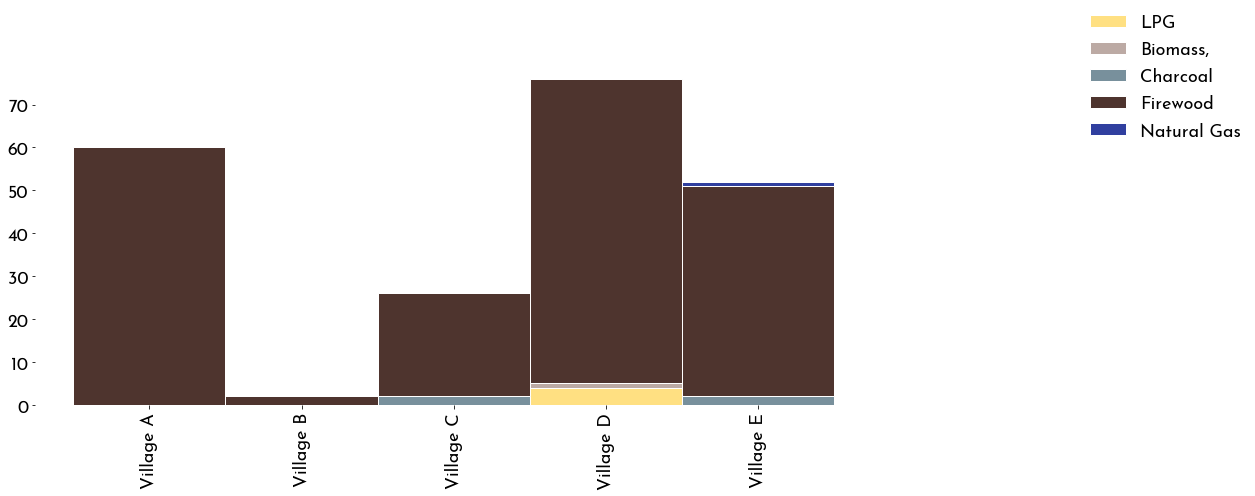

In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.cooking_fuels_summary(legend=True)

### Attributed describing access to cooking solutions

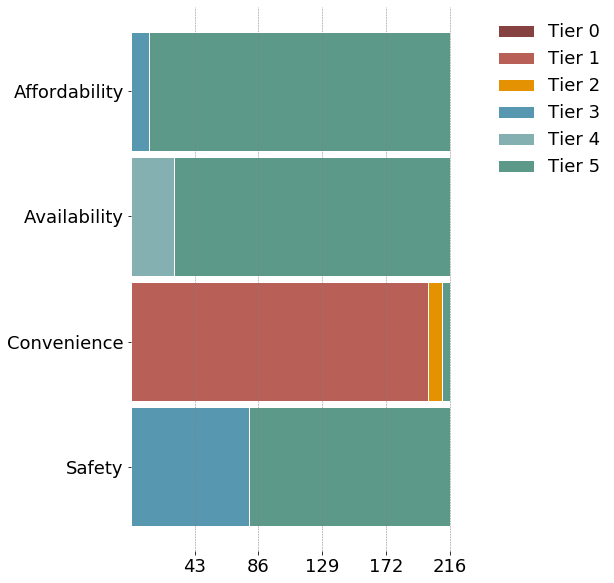

In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.tier_barh(hedera.keys().attributes_cooking[0:4],hedera.names('en').c_attributes[0:4],legend=True)

### MTF Index (Cooking solutions)
The MTF Index, for each household, is given by the minimum ranking among all attributes

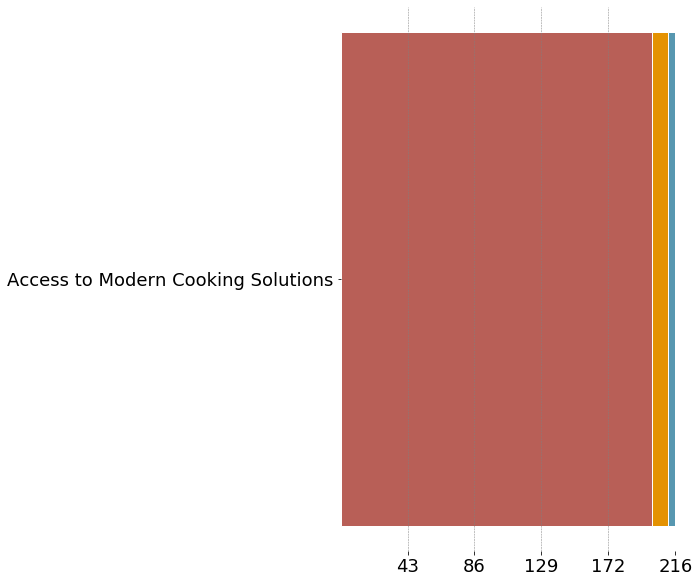

In [11]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.tier_barh(['C_Index'],['Access to Modern Cooking Solutions'])

### MTF Index (Cooking Solutions) vs. Primary Cooking Fuel

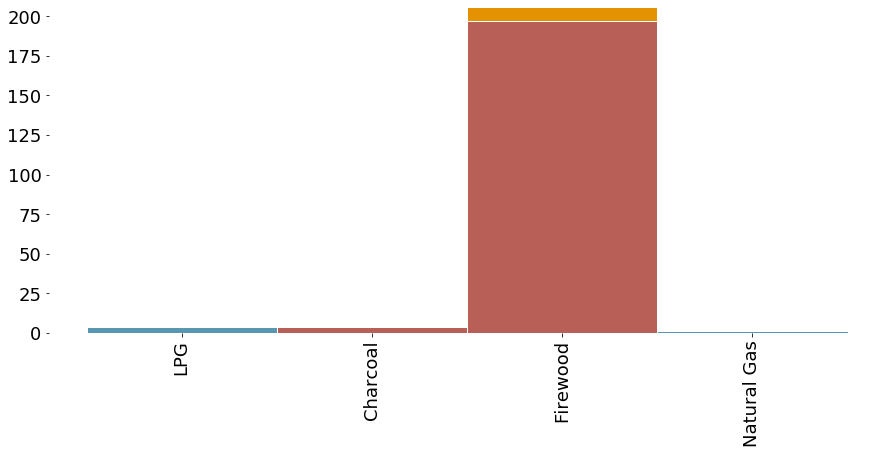

In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.stacked_tier_per_category('C_Index',hedera.keys().fuels,
                              'primary_cooking_fuel',
                              hedera.names('en').fuels)